# wiener filtering

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


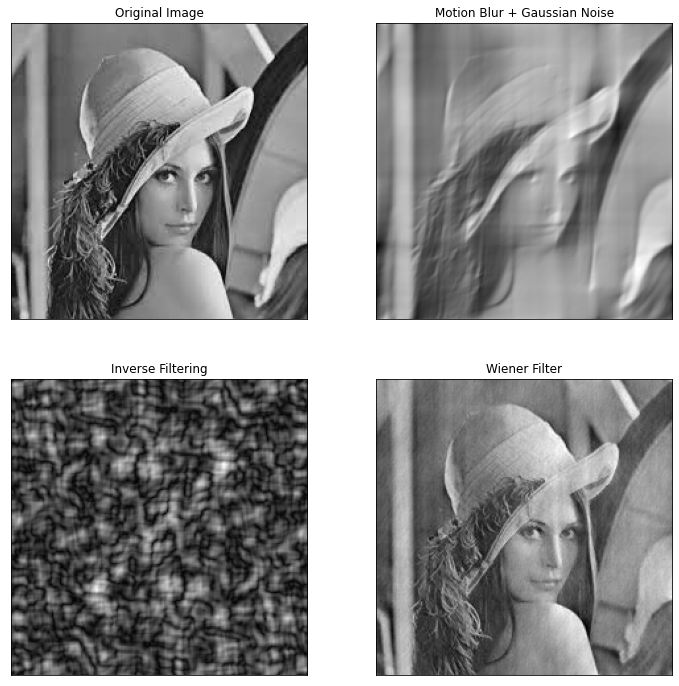

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def motion_process(height, weight, k=0.001):
    h_uv = np.zeros((height, weight), dtype='complex128')
    for u in range(height):
        for v in range(weight):
            q = np.power((u ** 2 + v ** 2), (5.0 / 6.0))
            h_uv[u][v] = np.exp(-(k * q))
    return h_uv


def blur_noise(src, h_uv):
    noise = np.random.normal(0, 1, size=src.shape)
    f_uv = np.fft.fft2(src)
    arr = np.multiply(f_uv, h_uv) + noise
    return arr, noise


def winner(src, h_uv, k=0.001):
    p_uv = np.conj(h_uv) / (np.abs(h_uv) ** 2 + 0.00005*k)
    rst = np.multiply(src, p_uv)
    return np.abs(np.fft.ifft2(rst))


def inv_filter(src, h_uv):
    p_uv = 1 / h_uv
    rst = np.multiply(src, p_uv)
    return np.abs(np.fft.ifft2(rst))


def main(img_path):
    img_path='/content/lena.jpg'
    src = np.array(Image.open(img_path).convert("L"))
    height, weight = src.shape
    h_uv = motion_process(height, weight, k=0.001)
    noise_src, noise = blur_noise(src, h_uv)
    mov_noi_src = np.abs(np.fft.ifft2(noise_src))
    k = np.power(np.abs(np.fft.fft2(noise)), 2) / np.power(np.abs(np.fft.fft2(src)), 2)

    src_processed_inv_filter = inv_filter(noise_src, h_uv)
    src_processed_winner = winner(noise_src, h_uv, k)

    img_list = [src, mov_noi_src, src_processed_inv_filter, src_processed_winner]
    img_name = ["Original Image", "Motion Blur + Gaussian Noise", "Inverse Filtering", "Wiener Filter"]

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    _, axs = plt.subplots(2, 2, figsize=(12, 12))

    for i in range(2):
        for j in range(2):
            axs[i][j].imshow(img_list[i * 2 + j], cmap='gray')
            axs[i][j].set_title(img_name[i * 2 + j])
            axs[i][j].axes.get_xaxis().set_visible(False)
            axs[i][j].axes.get_yaxis().set_visible(False)

    plt.show()


if __name__ == '__main__':
    main('man.jpg')